In [5]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# European Social Survey

In [65]:
variables_of_interest = ['trstprl', 'imsmetn', 'polintr', 'lrscale', 'stflife', 'sclmeet', 'sclact', 'psppsgva', 'vote', 'agea', 'gndr', 'edulvlb', 'edulvlfb', 'edulvlmb', 'marsts','health', 'happy']

In [66]:
variables = pd.read_csv('archive/variables.csv')
df = pd.read_csv('archive/ESS8e02.1_F1.csv')

/tmp/ipykernel_6065/740177233.py:2: DtypeWarning: Columns (164) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('archive/ESS8e02.1_F1.csv')


In [12]:
# Dataset size
len(df)

44387

In [67]:
df = df[variables_of_interest]

In [68]:
df.isna().sum()[df.isna().sum()>0]

Series([], dtype: int64)

In [69]:
df.nunique()

trstprl     14
imsmetn      7
polintr      7
lrscale     14
stflife     14
sclmeet     10
sclact       8
psppsgva     8
vote         6
agea        87
gndr         3
edulvlb     31
edulvlfb    31
edulvlmb    31
marsts      10
health       8
happy       14
dtype: int64

In [93]:
X = df.drop('happy', axis=1)
y = df['happy']

In [94]:
X['agea'].head(5)

0    34
1    52
2    68
3    54
4    20
Name: agea, dtype: int64

In [95]:
scale = MinMaxScaler()

X['agea'] = scale.fit_transform(np.reshape(X['agea'].values, (-1, 1)))

In [96]:
X['agea'].head(5)

0    0.019309
1    0.037602
2    0.053862
3    0.039634
4    0.005081
Name: agea, dtype: float64

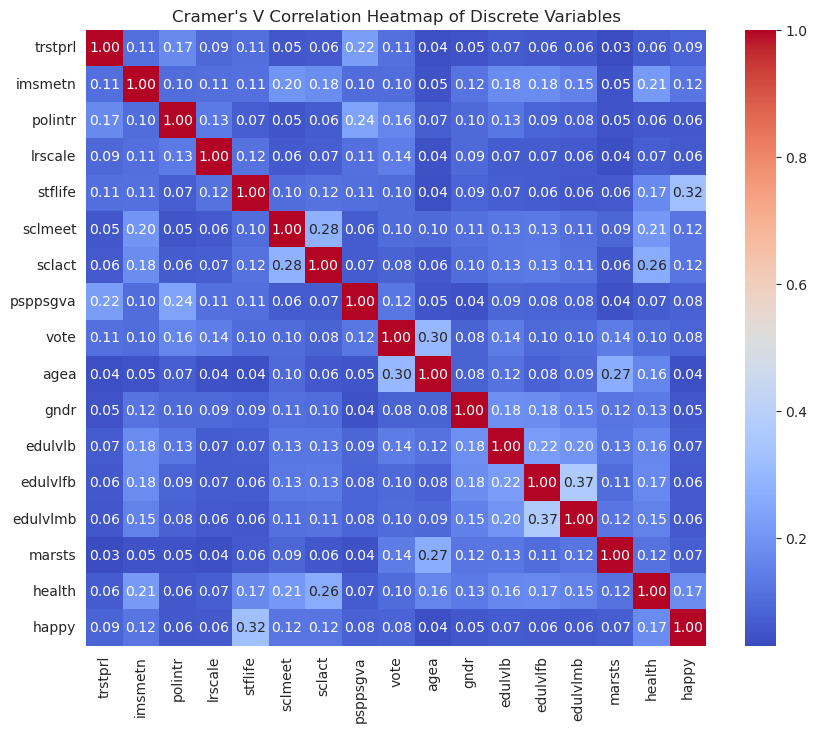

In [97]:

# Calculate Cramér's V for each pair of discrete variables
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = sp.stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Calculate the correlation matrix using Cramér's V
correlation_matrix = pd.DataFrame(index=df.columns, columns=df.columns)
for i in df.columns:
    for j in df.columns:
        correlation_matrix.loc[i, j] = cramers_v(df[i], df[j])

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Cramer's V Correlation Heatmap of Discrete Variables")
plt.show()


In [117]:
tree = RandomForestClassifier(n_estimators=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

tree.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

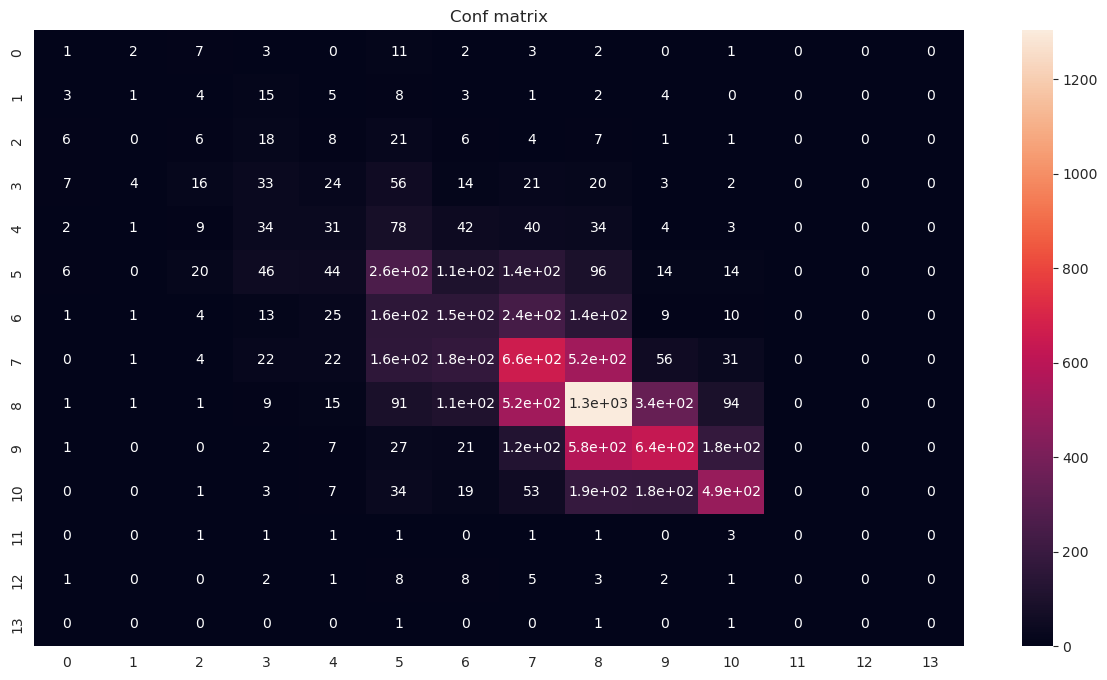

In [121]:
plt.figure(figsize=(15, 8))
sns.heatmap(confusion_matrix(y_test, tree.predict(X_test)), annot=True)
plt.title("Conf matrix")
plt.show()

In [120]:
accuracy_score(y_train, tree.predict(X_train)), accuracy_score(y_test, tree.predict(X_test))

(0.9861443577684531, 0.40301869790493355)

# Human Activity Recognition with Smartphones

In [3]:
train_df = pd.read_csv('archive (1)/train.csv', index_col=False)
test_df = pd.read_csv('archive (1)/test.csv', index_col=False)

In [52]:
train_df.head(3)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING


In [4]:
len(train_df), len(test_df)

(7352, 2947)

In [5]:
len(train_df.isna().sum()[train_df.isna().sum()==0]), len(train_df.columns)

(563, 563)

<Axes: xlabel='Activity', ylabel='count'>

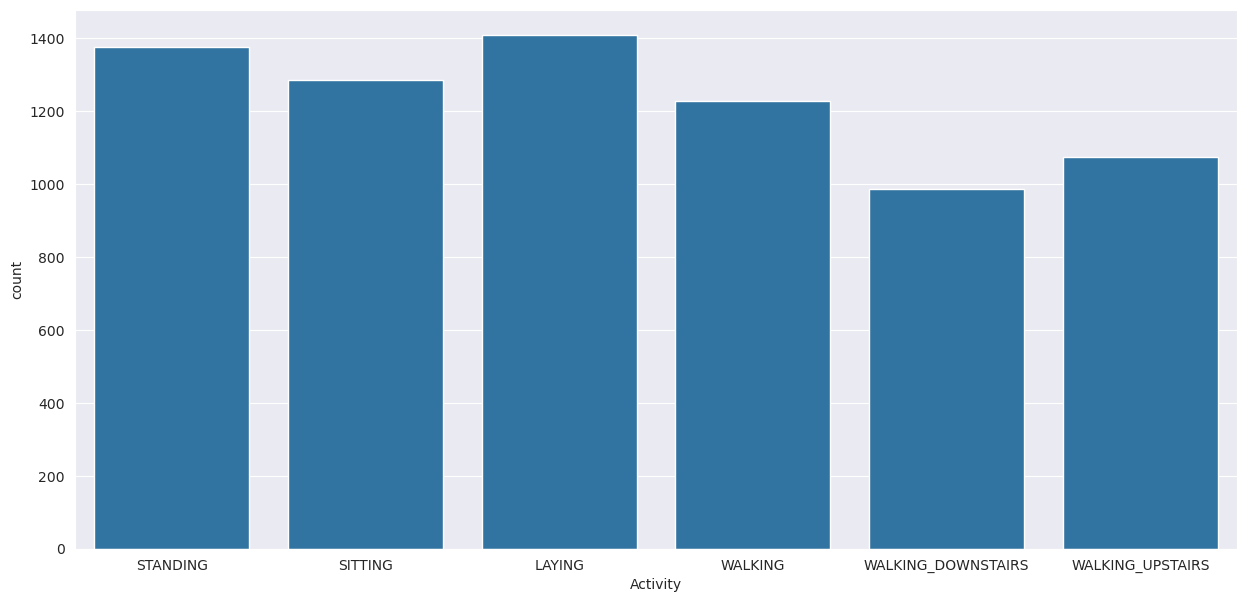

In [6]:
plt.figure(figsize=(15,7))
sns.countplot(train_df, x='Activity')

<Axes: xlabel='Activity', ylabel='count'>

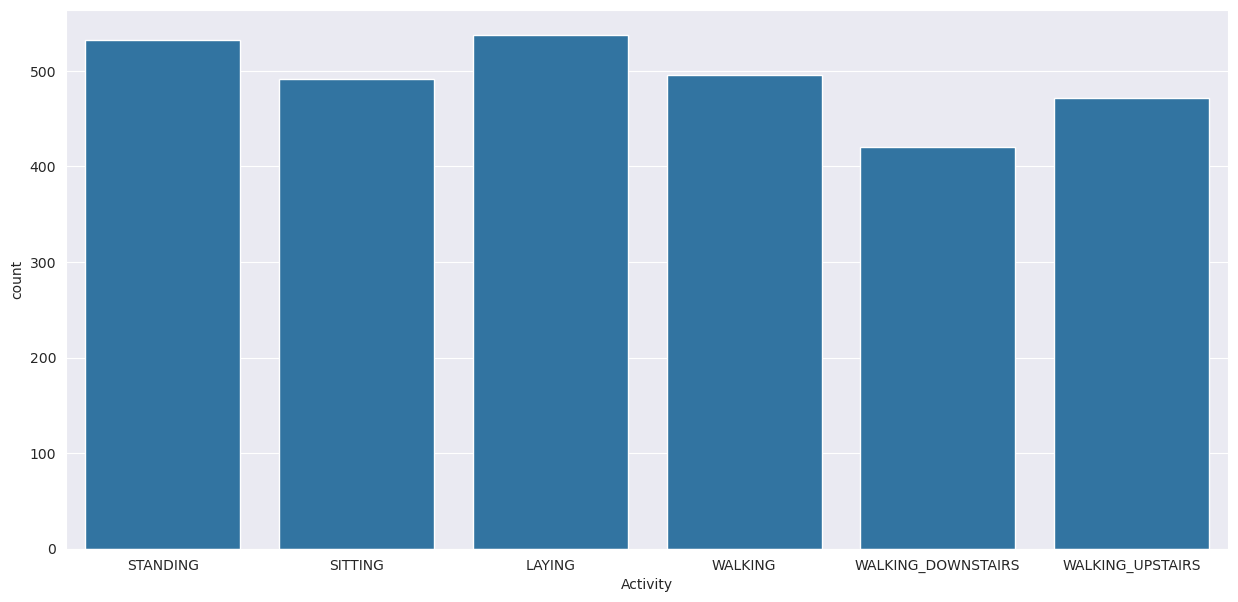

In [41]:
plt.figure(figsize=(15, 7))
sns.countplot(test_df, x='Activity')

In [7]:
train_df['Activity'].value_counts()/len(train_df)

Activity
LAYING                0.191376
STANDING              0.186888
SITTING               0.174918
WALKING               0.166757
WALKING_UPSTAIRS      0.145947
WALKING_DOWNSTAIRS    0.134113
Name: count, dtype: float64

In [8]:
train_df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [4]:
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

## PNN

In [9]:
le = LabelEncoder()

train_df['Encoded_Activity'] = le.fit_transform(train_df['Activity'])
test_df['Encoded_Activity'] = le.transform(test_df['Activity'])

In [12]:
train_X = train_df.drop(['Encoded_Activity', 'Activity'], axis=1).values
train_y = train_df['Encoded_Activity'].values

test_X = test_df.drop(['Encoded_Activity', 'Activity'], axis=1).values
test_y = test_df['Encoded_Activity'].values

train_X.shape, test_X.shape, train_y.shape, test_y.shape

((7352, 562), (2947, 562), (7352,), (2947,))

In [47]:
class ProbabilisticNN:
    def __init__(self, sigma=1.0):
        self.sigma = sigma

        self.centers = None
        self.targets = None
        self.num_classes = None
        self.num_features = None

    def fit(self, X, y):
        self.centers = [[] for _ in np.unique(y)]
        self.num_classes = len(np.unique(y))
        self.num_features = X.shape[1]
        self.targets = y

        X = self.input_layer(X)

        for index in range(X.shape[0]):
            self.centers[y[index]].append(X[index])

        for index in range(self.num_classes):
            self.centers[index] = np.array(self.centers[index])


    def input_layer(self, inputs):
        median = np.median(inputs, axis=0)
        iqr = np.percentile(inputs, 75, axis=0) - np.percentile(inputs, 25, axis=0)

        return (inputs-median)/iqr

    def _activation(self, inputs, label):
        diff = inputs - self.centers[label]
        squared = diff ** 2
        distance = np.sqrt(np.sum(squared, axis=1))
        return np.exp(-distance/(2 * self.sigma ** 2))


    def summation_layer(self, inputs):
        summed = np.zeros((inputs.shape[0], self.num_classes))

        for index in range(inputs.shape[0]):
            for label in range(self.num_classes):
                summed[index, label] = np.sum(self._activation(inputs[index], label))
                summed[index, label] /= self.centers[label].shape[0]
                summed[index, label] *= (np.sqrt(2 * np.pi) * self.sigma) ** (-self.num_features)

        return summed

    def output_layer(self, inputs):
        return np.argmax(inputs, axis=1)

    def predict(self, X):
        x = self.input_layer(X)
        x = self.summation_layer(x)

        return self.output_layer(x)

    def evaluate(self, X, y_true):
        y_pred = self.predict(X)
        return accuracy_score(y_true, y_pred),\
               precision_score(y_true, y_pred, average='weighted'),\
               recall_score(y_true, y_pred, average='weighted'),\
               confusion_matrix(y_true, y_pred)



In [48]:
model = ProbabilisticNN()
model.fit(train_X, train_y)

accuracy, precision, recall, conf_matrix = model.evaluate(test_X, test_y)
print(f"Accuracy: {accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}")

Accuracy: 0.77
Precision: 0.83
Recall: 0.77


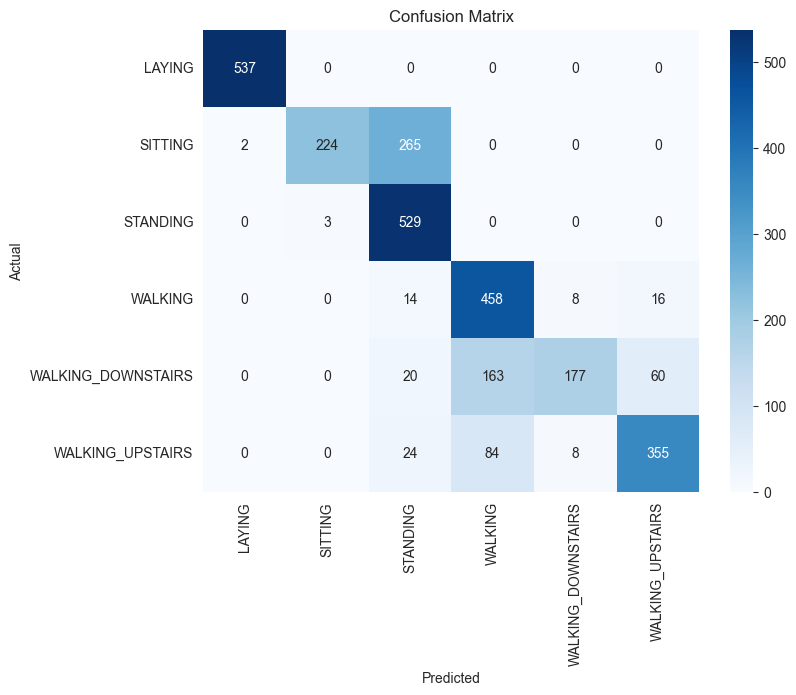

In [51]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Simple DNN

In [59]:
scaler = MinMaxScaler()

labels = {label: index for index, label in enumerate(train_df['Activity'].unique())}

train_df['Encoded_Activity'] = train_df['Activity'].map(labels)
test_df['Encoded_Activity'] = test_df['Activity'].map(labels)


X_train = scaler.fit_transform(train_df.drop('Activity', axis=1).values)
y_train = tf.one_hot(indices=train_df['Encoded_Activity'].values, depth=6)

X_test = scaler.transform(test_df.drop('Activity', axis=1).values)
y_test = tf.one_hot(indices=test_df['Encoded_Activity'].values, depth=6)

In [60]:
y_train

<tf.Tensor: shape=(7352, 6), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [61]:
inputs = tf.keras.Input(shape=(X_train.shape[-1],))
x = tf.keras.layers.Dense(512, activation='elu', kernel_initializer='he_normal')(inputs)
x = tf.keras.layers.Dense(256, activation='elu', kernel_initializer='he_normal')(x)
x = tf.keras.layers.Dense(128, activation='elu', kernel_initializer='he_normal')(x)
output = tf.keras.layers.Dense(6, activation='softmax')(x)

In [62]:
model = tf.keras.Model(inputs=inputs, outputs=output)

In [63]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 563)]             0         
                                                                 
 dense_4 (Dense)             (None, 512)               288768    
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 6)                 774       
                                                                 
Total params: 453766 (1.73 MB)
Trainable params: 453766 (1.73 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [64]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [65]:
callback = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True, verbose=True,monitor='val_loss')
history = model.fit(x=X_train, y=y_train, validation_split=0.2, epochs=50, callbacks=[callback], batch_size=32, verbose=1)

Epoch 1/50


2023-10-30 12:51:12.590464: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0xc2794f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-30 12:51:12.590567: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1050 Ti, Compute Capability 6.1
2023-10-30 12:51:12.714681: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-30 12:51:12.772941: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-10-30 12:51:13.044578: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


184/184 [==============================] - 3s 4ms/step - loss: 0.3367 - accuracy: 0.8825 - val_loss: 0.0343 - val_accuracy: 0.9932
Epoch 2/50
184/184 [==============================] - 1s 3ms/step - loss: 0.0277 - accuracy: 0.9913 - val_loss: 0.0177 - val_accuracy: 0.9959
Epoch 3/50
184/184 [==============================] - 1s 3ms/step - loss: 0.0511 - accuracy: 0.9857 - val_loss: 0.0045 - val_accuracy: 0.9986
Epoch 4/50
184/184 [==============================] - 1s 3ms/step - loss: 0.0134 - accuracy: 0.9956 - val_loss: 0.0396 - val_accuracy: 0.9816
Epoch 5/50
184/184 [==============================] - 1s 3ms/step - loss: 0.0083 - accuracy: 0.9973 - val_loss: 0.0048 - val_accuracy: 0.9993
Epoch 6/50
184/184 [==============================] - 1s 3ms/step - loss: 0.0148 - accuracy: 0.9957 - val_loss: 0.0120 - val_accuracy: 0.9973
Epoch 6: early stopping


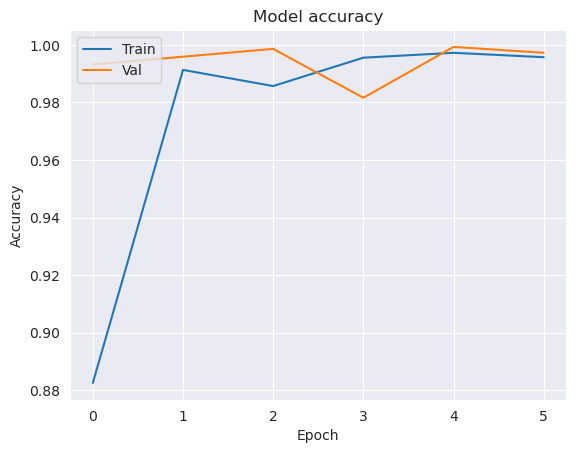

In [75]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

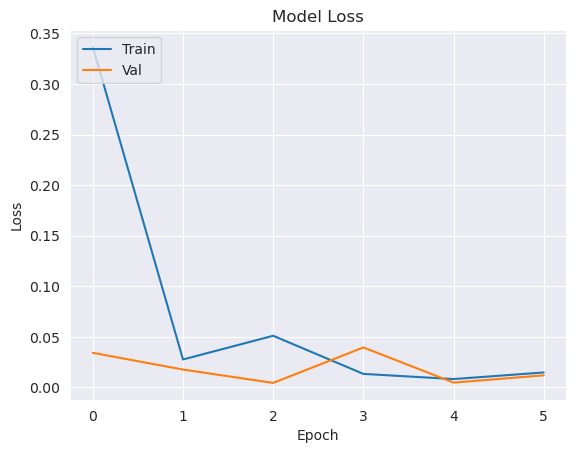

In [76]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [88]:
test_probs = model.predict(X_test)
test_probs

93/93 [==============================] - 0s 1ms/step


array([[9.9992549e-01, 9.0987351e-06, 1.0858062e-06, 6.4350490e-05,
        1.4209465e-09, 1.1849106e-09],
       [1.1682264e-03, 3.2122628e-07, 5.1905675e-04, 9.9830699e-01,
        4.2681194e-07, 4.8743714e-06],
       [5.7144530e-06, 1.1923744e-08, 1.1636413e-05, 9.9997866e-01,
        6.1914136e-08, 3.8798826e-06],
       ...,
       [9.7556522e-06, 2.5638650e-07, 5.0104496e-05, 9.9979955e-01,
        5.7180210e-07, 1.3978267e-04],
       [1.1821291e-05, 5.9639810e-08, 1.7578783e-05, 9.9992788e-01,
        6.7609921e-07, 4.1968269e-05],
       [1.3564802e-04, 3.6857195e-08, 9.9986243e-01, 1.8865845e-06,
        1.7952624e-08, 7.4116753e-09]], dtype=float32)

In [89]:
test_y_true = tf.argmax(y_test, axis=1)
test_y_predictions = tf.argmax(test_probs, axis=1)

test_y_true.shape, test_y_predictions.shape

(TensorShape([2947]), TensorShape([2947]))

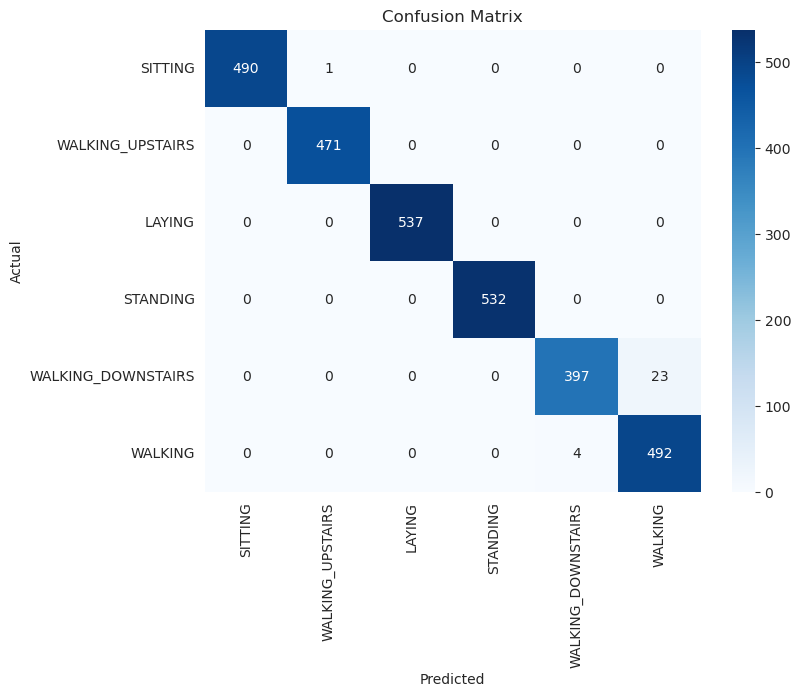

In [95]:
# Create confusion matrix
conf_matrix = confusion_matrix(test_y_true, test_y_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [91]:
accuracy = accuracy_score(test_y_true, test_y_predictions)
recall = recall_score(test_y_true, test_y_predictions, average='weighted')
precision = precision_score(test_y_true, test_y_predictions, average='weighted')

In [94]:
print(f"Accuracy Score: {accuracy*100:.2f}%\nRecall Score: {recall:.4f}\nPrecision Score: {precision:.4f}")

Accuracy Score: 99.05%
Recall Score: 0.9905
Precision Score: 0.9907


In [96]:
model.save('model.keras')